In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import torch
import torch.nn as nn
import NO_utils_multiple

## Import a sample dataset ##

In [71]:
# Load data from .npy files
data_dir = r"C:\Users\hz283\Documents\Duke\Research\NO-2D-Metamaterials\data\reserved"

# First let me print the contents of the directory to see what files are actually there
import os
print("Files in directory:")
for file in os.listdir(data_dir):
    if file.endswith('.npy'):
        print(file)

# Load each .npy file into appropriately named variables
bands_fft = np.load(os.path.join(data_dir, 'bands_fft.npy'))
designs = np.load(os.path.join(data_dir, 'designs.npy'))
design_params = np.load(os.path.join(data_dir, 'design_params.npy'))
frequencies = np.load(os.path.join(data_dir, 'eigenvalue_data.npy'))
displacements_x = np.load(os.path.join(data_dir, 'eigenvector_data_x.npy'))
displacements_y = np.load(os.path.join(data_dir, 'eigenvector_data_y.npy'))
waveforms = np.load(os.path.join(data_dir, 'waveforms.npy'))
wavevectors = np.load(os.path.join(data_dir, 'wavevectors.npy'))


Files in directory:
bands_fft.npy
designs.npy
design_params.npy
eigenvalue_data.npy
eigenvector_data_x.npy
eigenvector_data_y.npy
waveforms.npy
wavevectors.npy


In [72]:
print("bands_fft shape:", bands_fft.shape)
print("designs shape:", designs.shape)
print("design_params shape:", design_params.shape)
print("frequencies shape:", frequencies.shape)
print("displacements_x shape:", displacements_x.shape)
print("displacements_y shape:", displacements_y.shape)
print("waveforms shape:", waveforms.shape)
print("wavevectors shape:", wavevectors.shape)

# Save just the first entry of wavevectors as the new wavevectors.npy
np.save(os.path.join(data_dir, 'wavevectors.npy'), wavevectors[0])


bands_fft shape: (6, 32, 32)
designs shape: (600, 32, 32)
design_params shape: (1, 6)
frequencies shape: (600, 325, 6)
displacements_x shape: (600, 325, 6, 32, 32)
displacements_y shape: (600, 325, 6, 32, 32)
waveforms shape: (325, 32, 32)
wavevectors shape: (600, 325, 2)


C:\Users\hz283\AppData\Local\Temp\ipykernel_13060\2275921184.py:39: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])  # Adjust layout to make room for colorbar


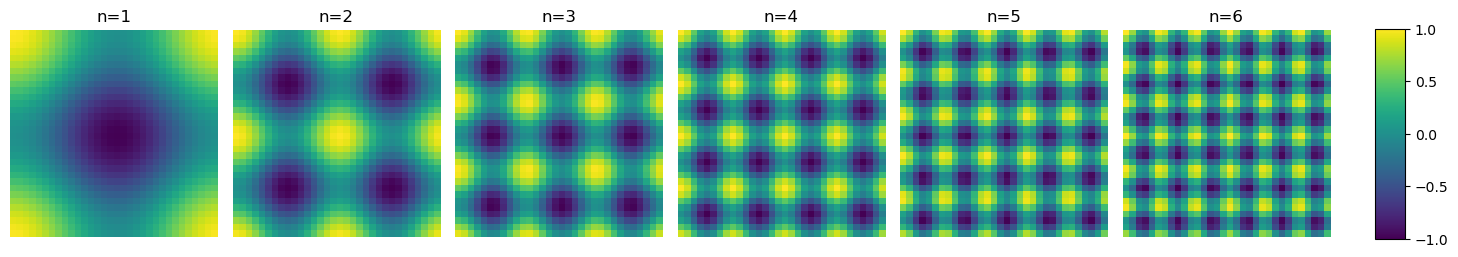

C:\Users\hz283\AppData\Local\Temp\ipykernel_13060\2275921184.py:56: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])  # Adjust layout to make room for colorbar


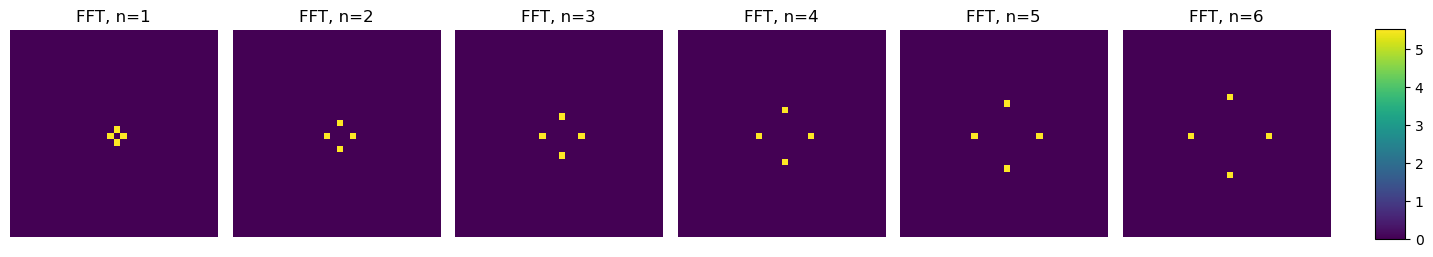

In [25]:
# Create list of integers
bands = list(range(1, 7))

def embed_1d_integer_sinusoidal(n, size=32):
    """
    Embed an integer as a size x size image using Fourier embedding
    
    Args:
        n (int): Integer to embed
        size (int): Size of output image (default 32)
    
    Returns:
        np.ndarray: size x size image embedding of the integer
    """
    # Create coordinate grid from 0 to 31
    x = np.arange(size)
    y = np.arange(size)
    X, Y = np.meshgrid(x, y)
    
    # Create pattern using cosine product with x and y
    pattern = (np.cos((Y)*n*np.pi/16) + np.cos((X)*n*np.pi/16))/2
    
    return pattern

# Generate embeddings for each integer
sinusoidal_embeddings_1d = np.array([embed_1d_integer_sinusoidal(n) for n in bands])

# Visualize the embeddings
fig, axes = plt.subplots(1, len(bands), figsize=(15, 3), gridspec_kw={'width_ratios': [1]*len(bands)})
images = []
for i, ax in enumerate(axes):
    im = ax.imshow(sinusoidal_embeddings_1d[i], cmap='viridis')
    images.append(im)
    ax.axis('off')
    ax.set_title(f'n={bands[i]}')
# Add colorbar in a way that doesn't overlap with the plots
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])  # [left, bottom, width, height]
fig.colorbar(images[0], cax=cbar_ax)
plt.tight_layout(rect=[0, 0, 0.9, 1])  # Adjust layout to make room for colorbar
plt.show()

# Compute and visualize the Fourier transforms of the embeddings
fourier_transforms_1d_sinusoidal = np.array([np.fft.fftshift(np.abs(np.fft.fft2(embedding))) for embedding in sinusoidal_embeddings_1d])

# Plot the Fourier transforms
fig, axes = plt.subplots(1, len(bands), figsize=(15, 3), gridspec_kw={'width_ratios': [1]*len(bands)})
images = []
for i, ax in enumerate(axes):
    im = ax.imshow(np.log1p(fourier_transforms_1d_sinusoidal[i]), cmap='viridis')  # log scale for better visibility
    images.append(im)
    ax.axis('off') 
    ax.set_title(f'FFT, n={bands[i]}')
# Add colorbar in a way that doesn't overlap with the plots
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])  # [left, bottom, width, height]
fig.colorbar(images[0], cax=cbar_ax)
plt.tight_layout(rect=[0, 0, 0.9, 1])  # Adjust layout to make room for colorbar
plt.show()

Spatial waves shape: (325, 32, 32)


C:\Users\hz283\AppData\Local\Temp\ipykernel_13060\2134496745.py:68: UserWarning: Adding colorbar to a different Figure <Figure size 1500x1500 with 16 Axes> than <Figure size 1800x300 with 7 Axes> which fig.colorbar is called on.
  fig.colorbar(images[0], cax=cbar_ax)
C:\Users\hz283\AppData\Local\Temp\ipykernel_13060\2134496745.py:69: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])  # Adjust layout to make room for colorbar


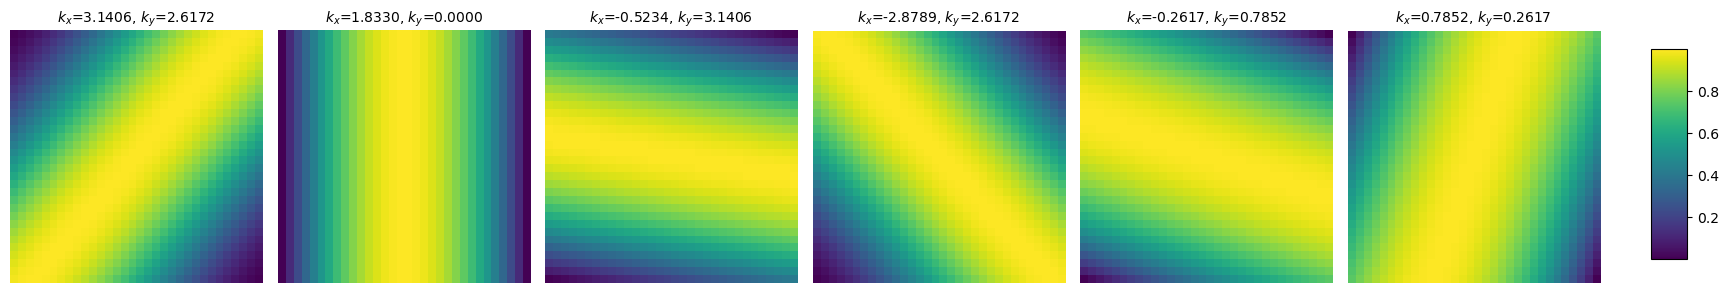

C:\Users\hz283\AppData\Local\Temp\ipykernel_13060\2134496745.py:80: UserWarning: Adding colorbar to a different Figure <Figure size 1500x1500 with 16 Axes> than <Figure size 1800x300 with 7 Axes> which fig.colorbar is called on.
  fig.colorbar(images[0], cax=cbar_ax)
C:\Users\hz283\AppData\Local\Temp\ipykernel_13060\2134496745.py:81: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])  # Adjust layout to make room for colorbar


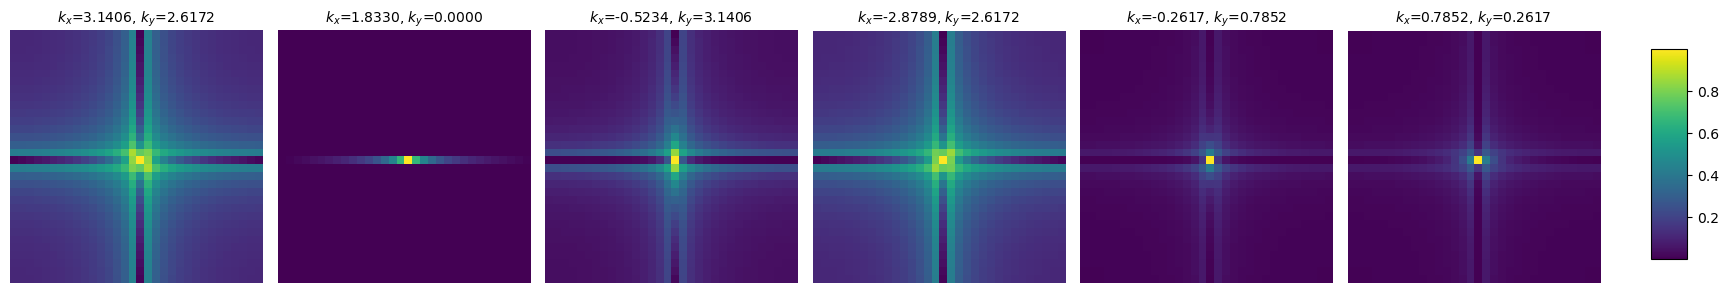

In [77]:
wavevector_pairs = wavevectors[0]

def wavevectors_to_spatial(wavevectors, design_res, length_scale, amplitude=1.0, phase=0.0, plot_sample=False):
    """
    Convert a 2D array of wavevectors for a single sample into their spatial representations.

    Parameters:
        wavevectors (np.ndarray): 2D array of wavevectors with shape (W, 2),
                                  where W is the number of wavevectors,
                                  and the second index is the vector component in x and y.
        design_res (int): Resolution of the output grid.
        length_scale (float): Total length scale of the grid (meters).
        amplitude (float, optional): Amplitude of the wave. Default is 1.0.
        phase (float, optional): Phase shift of the wave. Default is 0.0.
        plot_sample (bool, optional): If True, plot a random sample of the output spatial waves.

    Returns:
        np.ndarray: 3D array of shape (W, design_res, design_res) with the wave values.
    """
    W = wavevectors.shape[0]

    # Define the spatial grid
    x = np.linspace(-length_scale/2, length_scale/2, design_res)
    y = np.linspace(-length_scale/2, length_scale/2, design_res)
    X, Y = np.meshgrid(x, y)

    # Initialize the output array
    spatial_waves = np.zeros((W, design_res, design_res))

    # Generate the spatial representations
    for j in range(W):
        k_x = wavevectors[j, 0]
        k_y = wavevectors[j, 1]
        spatial_waves[j] = amplitude * np.cos(k_x * X + k_y * Y + phase)

    # Plot a random sample if requested
    if plot_sample:
        sample_w = random.randint(0, W - 1)
        plt.figure(figsize=(6, 6))
        plt.contourf(spatial_waves[sample_w], cmap='viridis')
        plt.colorbar(label='Wave Amplitude')
        plt.xlabel('x (m)')
        plt.ylabel('y (m)')
        plt.title(f'Spatial Wave: Wavevector {sample_w} with $k_x$={wavevectors[sample_w, 0]} $m^{{-1}}$, $k_y$={wavevectors[sample_w, 1]} $m^{{-1}}$')
        plt.show()

    print('Spatial waves shape:', spatial_waves.shape)
    return spatial_waves

spatial_encoding_2d = wavevectors_to_spatial(wavevector_pairs, design_res=32, length_scale=1.0)
fourier_encoding_2d = np.array([np.fft.fftshift(np.abs(np.fft.fft2(embedding))) for embedding in spatial_encoding_2d])

import numpy as np

# Randomly select 6 unique indices
num_samples = 6
total_samples = spatial_encoding_2d.shape[0]
random_indices = np.random.choice(total_samples, size=num_samples, replace=False)

fig, axes = plt.subplots(1, num_samples, figsize=(18, 3))
for idx, ax in zip(random_indices, axes):
    im = ax.imshow(spatial_encoding_2d[idx], cmap='viridis')
    ax.axis('off')
    kx = wavevector_pairs[idx][0]
    ky = wavevector_pairs[idx][1]
    ax.set_title(f"$k_x$={kx:.4f}, $k_y$={ky:.4f}", fontsize=10)
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])  # [left, bottom, width, height]
fig.colorbar(images[0], cax=cbar_ax)
plt.tight_layout(rect=[0, 0, 0.9, 1])  # Adjust layout to make room for colorbar
plt.show()

fig, axes = plt.subplots(1, num_samples, figsize=(18, 3))
for idx, ax in zip(random_indices, axes):
    im = ax.imshow(np.log1p(fourier_encoding_2d[idx]), cmap='viridis')
    ax.axis('off')
    kx = wavevector_pairs[idx][0]
    ky = wavevector_pairs[idx][1]
    ax.set_title(f"$k_x$={kx:.4f}, $k_y$={ky:.4f}", fontsize=10)
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])  # [left, bottom, width, height]
fig.colorbar(images[0], cax=cbar_ax)
plt.tight_layout(rect=[0, 0, 0.9, 1])  # Adjust layout to make room for colorbar
plt.show()


C:\Users\hz283\AppData\Local\Temp\ipykernel_13060\2863594362.py:58: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])  # Adjust layout to make room for colorbar


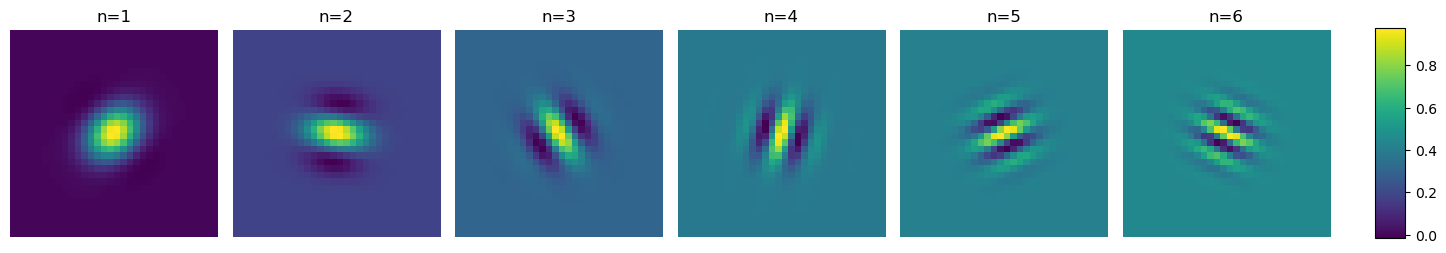

C:\Users\hz283\AppData\Local\Temp\ipykernel_13060\2863594362.py:78: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])  # Adjust layout to make room for colorbar


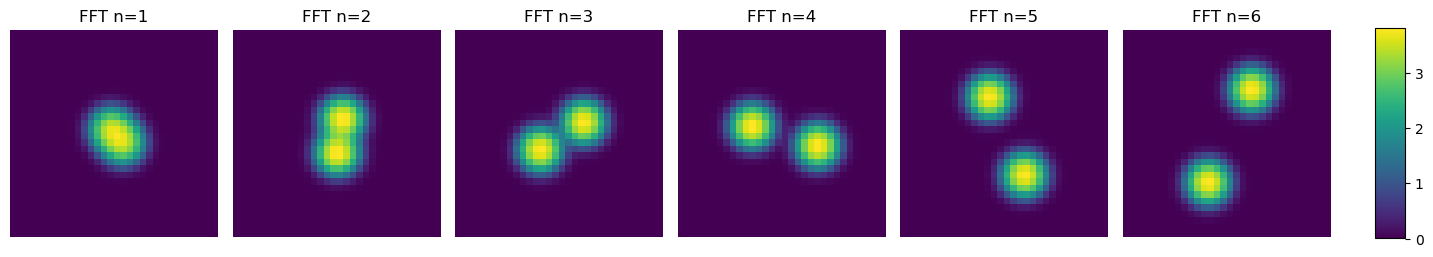


Time domain max values:
n=1: 0.9742
n=2: 0.9513
n=3: 0.9674
n=4: 0.9167
n=5: 0.9231
n=6: 0.9074

Frequency domain max values:
n=1: 43.8459
n=2: 28.6162
n=3: 29.5251
n=4: 28.8896
n=5: 29.6295
n=6: 29.4232


In [79]:
def embed_const_wavelet(s, size=32, freq_range=2.0):
    """
    Embed an integer into a 2D pattern using Gabor wavelets.
    
    Args:
        s: Positive integer to embed 
        size: Size of the square output array
        freq_range: Factor to control the frequency range (higher values = broader frequency range)
    
    Returns:
        2D numpy array with the Gabor wavelet embedding
    """
    # Create coordinate grid
    x = np.linspace(-1, 1, size)
    y = np.linspace(-1, 1, size)
    X, Y = np.meshgrid(x, y)
    
    # Set base frequency based on input scalar s
    # Use size as the fundamental frequency unit instead of pi
    base_frequency = (abs(s)) * (size/8)
    
    # Set orientation (in radians)
    theta = s % 8 * (size/8)  # Vary orientation based on s
    
    # Rotate coordinates
    X_theta = X * np.cos(theta) + Y * np.sin(theta)
    Y_theta = -X * np.sin(theta) + Y * np.cos(theta)
    
    # Gaussian envelope parameters - inversely related to freq_range
    # Higher freq_range means smaller sigma which creates broader frequency spectrum
    sigma_x = 0.4 / freq_range
    sigma_y = 0.4 / freq_range
    
    # Gaussian envelope - smaller sigma creates a more localized wavelet in space
    # which corresponds to a broader frequency spectrum in Fourier domain
    gaussian = np.exp(-(X_theta**2 / (2 * sigma_x**2) + Y_theta**2 / (2 * sigma_y**2)))
    
    # Gabor wavelet (sinusoidal carrier * gaussian envelope)
    gabor = gaussian * np.cos(base_frequency * X_theta)
    
    # Return the pattern without normalizing to preserve values
    return gabor

# Generate wavelet embeddings for each integer
wavelet_embeddings = np.array([embed_const_wavelet(s) for s in bands])

# Visualize the wavelet embeddings
fig, axes = plt.subplots(1, len(bands), figsize=(15, 3), gridspec_kw={'width_ratios': [1]*len(bands)})
images = []
for i, ax in enumerate(axes):
    im = ax.imshow(wavelet_embeddings[i], cmap='viridis')
    images.append(im)
    ax.axis('off')
    ax.set_title(f'n={bands[i]}')
# Add colorbar in a way that doesn't overlap with the plots
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])  # [left, bottom, width, height]
fig.colorbar(images[0], cax=cbar_ax)
plt.tight_layout(rect=[0, 0, 0.9, 1])  # Adjust layout to make room for colorbar
plt.show()

# Compute and visualize the Fourier transforms of the wavelet embeddings
wavelet_fourier = np.array([np.fft.fftshift(np.abs(np.fft.fft2(embedding))) for embedding in wavelet_embeddings])

# Normalize the Fourier transforms for better visualization
# wavelet_fourier = np.array([(ft - ft.min()) / (ft.max() - ft.min()) for ft in wavelet_fourier])

# Plot the Fourier transforms of wavelet embeddings
fig, axes = plt.subplots(1, len(bands), figsize=(15, 3), gridspec_kw={'width_ratios': [1]*len(bands)})
images = []
for i, ax in enumerate(axes):
    im = ax.imshow(np.log1p(wavelet_fourier[i]), cmap='viridis')  # log scale for better visibility
    images.append(im)
    ax.axis('off') 
    ax.set_title(f'FFT n={bands[i]}')
# Add colorbar in a way that doesn't overlap with the plots
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])  # [left, bottom, width, height]
fig.colorbar(images[0], cax=cbar_ax)
plt.tight_layout(rect=[0, 0, 0.9, 1])  # Adjust layout to make room for colorbar
plt.show()

# Print max values for time domain (wavelet embeddings)
print("\nTime domain max values:")
for i, val in enumerate(integers):
    max_val = np.max(np.abs(wavelet_embeddings[i]))
    print(f"n={val}: {max_val:.4f}")

# Print max values for frequency domain
print("\nFrequency domain max values:")
for i, val in enumerate(integers):
    max_val = np.max(wavelet_fourier[i]) 
    print(f"n={val}: {max_val:.4f}")


[array([3.14 , 2.617], dtype=float16), array([1.833, 0.   ], dtype=float16), array([-0.5234,  3.14  ], dtype=float16), array([-2.879,  2.617], dtype=float16), array([-0.2617,  0.785 ], dtype=float16), array([0.785 , 0.2617], dtype=float16)]


C:\Users\hz283\AppData\Local\Temp\ipykernel_13060\1023123521.py:75: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])


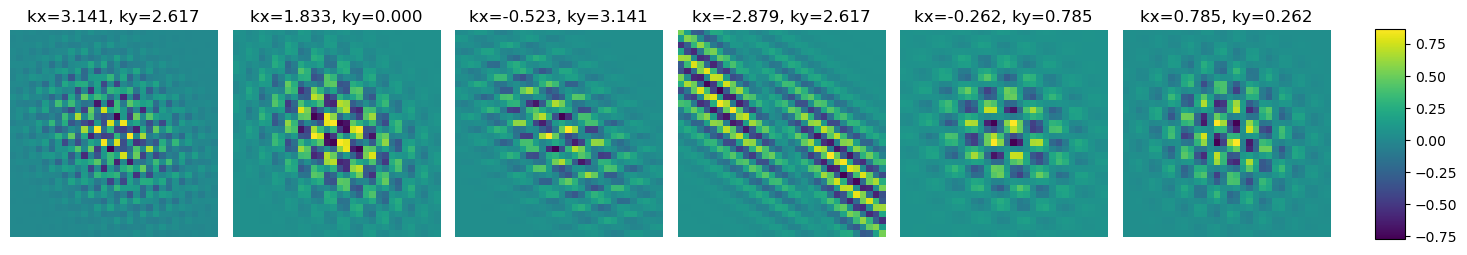

C:\Users\hz283\AppData\Local\Temp\ipykernel_13060\1023123521.py:99: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])


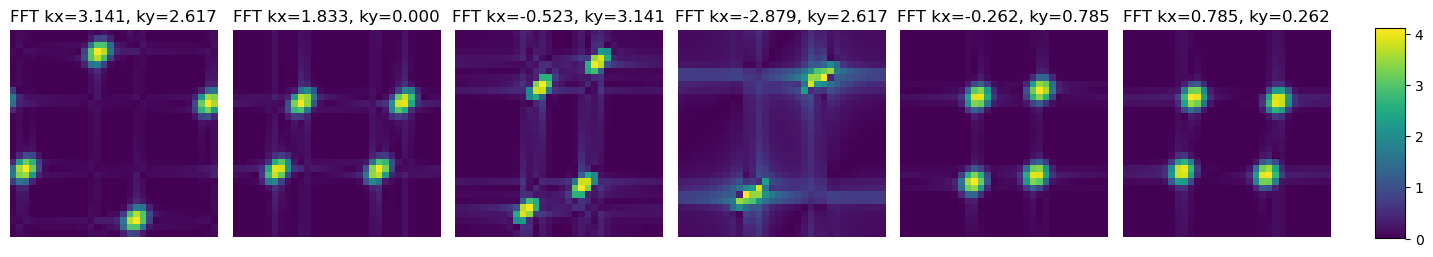

test_embeddings min: -0.883, max: 0.906
test_fourier min: 0.000, max: 60.107


In [85]:
def embed_2const_wavelet(c1, c2, size=32, freq_range=1.0):
    """
    Embed two integers into a 2D pattern using Gabor wavelets with different frequencies in x and y.
    
    Args:
        c1: First integer to embed (controls x frequency and rotation)
        c2: Second integer to embed (controls y frequency and rotation)
        size: Size of the square output array
        freq_range: Factor to control the frequency range (higher values = broader frequency spectrum)
    
    Returns:
        2D numpy array with the 2D Gabor wavelet embedding
    """
    # Create coordinate grid
    x = np.linspace(-1, 1, size)
    y = np.linspace(-1, 1, size)
    X, Y = np.meshgrid(x, y)
    
    # Set base frequencies based on input constants
    freq_x = (1.0 + (c1)) * (size/2)
    freq_y = (1.0 + (c2)) * (size/2)
    
    # Calculate rotation angles based on c1 and c2
    c1_cycles = 5  # Number of cycles in c1
    c2_cycles = 7  # Number of cycles in c2
    theta1 = (c1 % c1_cycles) * (np.pi/c1_cycles)  
    theta2 = (c2 % c2_cycles) * (np.pi/c2_cycles)  
    # theta = theta1 + theta2  # Combine rotations
    
    # Rotate coordinates
    X_rot = X * np.cos(theta1) + Y * np.sin(theta2)
    Y_rot = -X * np.sin(theta1) + Y * np.cos(theta2)
    
    # Gaussian envelope parameters
    sigma_x = 0.4 / freq_range
    sigma_y = 0.4 / freq_range
    
    # Gaussian envelope with rotated coordinates
    gaussian = np.exp(-(X_rot**2 / (2 * sigma_x**2) + Y_rot**2 / (2 * sigma_y**2)))
    
    # 2D Gabor wavelet with separate x and y frequencies on rotated coordinates
    gabor = gaussian * np.sin(freq_x * X_rot) * np.sin(freq_y * Y_rot)
    
    return gabor

# Test the new function with some example values
# pi = 1
# test_pairs = [(random.random()*2*pi - pi, random.random()*2*pi - pi) for _ in range(36)]
# test_embeddings = np.array([embed_2const_wavelet(c1, c2) for c1, c2 in test_pairs])
# Use the same random sampling of wavevectors as for the sinusoidal coding block above.
# We'll use the random_indices variable, which has already been defined, to select (c1, c2) pairs.
# Assume wavevectors is a list or array of (c1, c2) pairs.
test_pairs = [wavevector_pairs[i] for i in random_indices]
print(test_pairs)
test_embeddings = np.array([embed_2const_wavelet(c1/np.pi, c2/np.pi) for c1, c2 in test_pairs])

# Visualize the 2D wavelet embeddings
num_rows = (len(test_pairs) + 5) // 6  # Calculate number of rows needed for 6 plots per row
fig, axes = plt.subplots(num_rows, 6, figsize=(15, 3*num_rows))
axes = axes.flatten()  # Flatten array for easier indexing
images = []

for i, ax in enumerate(axes):
    if i < len(test_pairs):
        im = ax.imshow(test_embeddings[i], cmap='viridis')
        images.append(im)
        ax.axis('off')
        ax.set_title(f'kx={test_pairs[i][0]:.3f}, ky={test_pairs[i][1]:.3f}')
    else:
        ax.axis('off')  # Hide unused subplots

# Add colorbar
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
fig.colorbar(images[0], cax=cbar_ax)
plt.tight_layout(rect=[0, 0, 0.9, 1])
plt.show()

# Compute and visualize the Fourier transforms
test_fourier = np.array([np.fft.fftshift(np.abs(np.fft.fft2(embedding))) for embedding in test_embeddings])
# test_fourier = np.array([(ft - ft.min()) / (ft.max() - ft.min()) for ft in test_fourier])

# Plot the Fourier transforms
fig, axes = plt.subplots(num_rows, 6, figsize=(15, 3*num_rows))
axes = axes.flatten()
images = []

for i, ax in enumerate(axes):
    if i < len(test_pairs):
        im = ax.imshow(np.log1p(test_fourier[i]), cmap='viridis')
        images.append(im)
        ax.axis('off')
        ax.set_title(f'FFT kx={test_pairs[i][0]:.3f}, ky={test_pairs[i][1]:.3f}')
    else:
        ax.axis('off')  # Hide unused subplots

# Add colorbar
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
fig.colorbar(images[0], cax=cbar_ax)
plt.tight_layout(rect=[0, 0, 0.9, 1])
plt.show()

print(f"test_embeddings min: {test_embeddings.min():.3f}, max: {test_embeddings.max():.3f}")
print(f"test_fourier min: {test_fourier.min():.3f}, max: {test_fourier.max():.3f}")


C:\Users\hz283\AppData\Local\Temp\ipykernel_13060\2390243887.py:57: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])


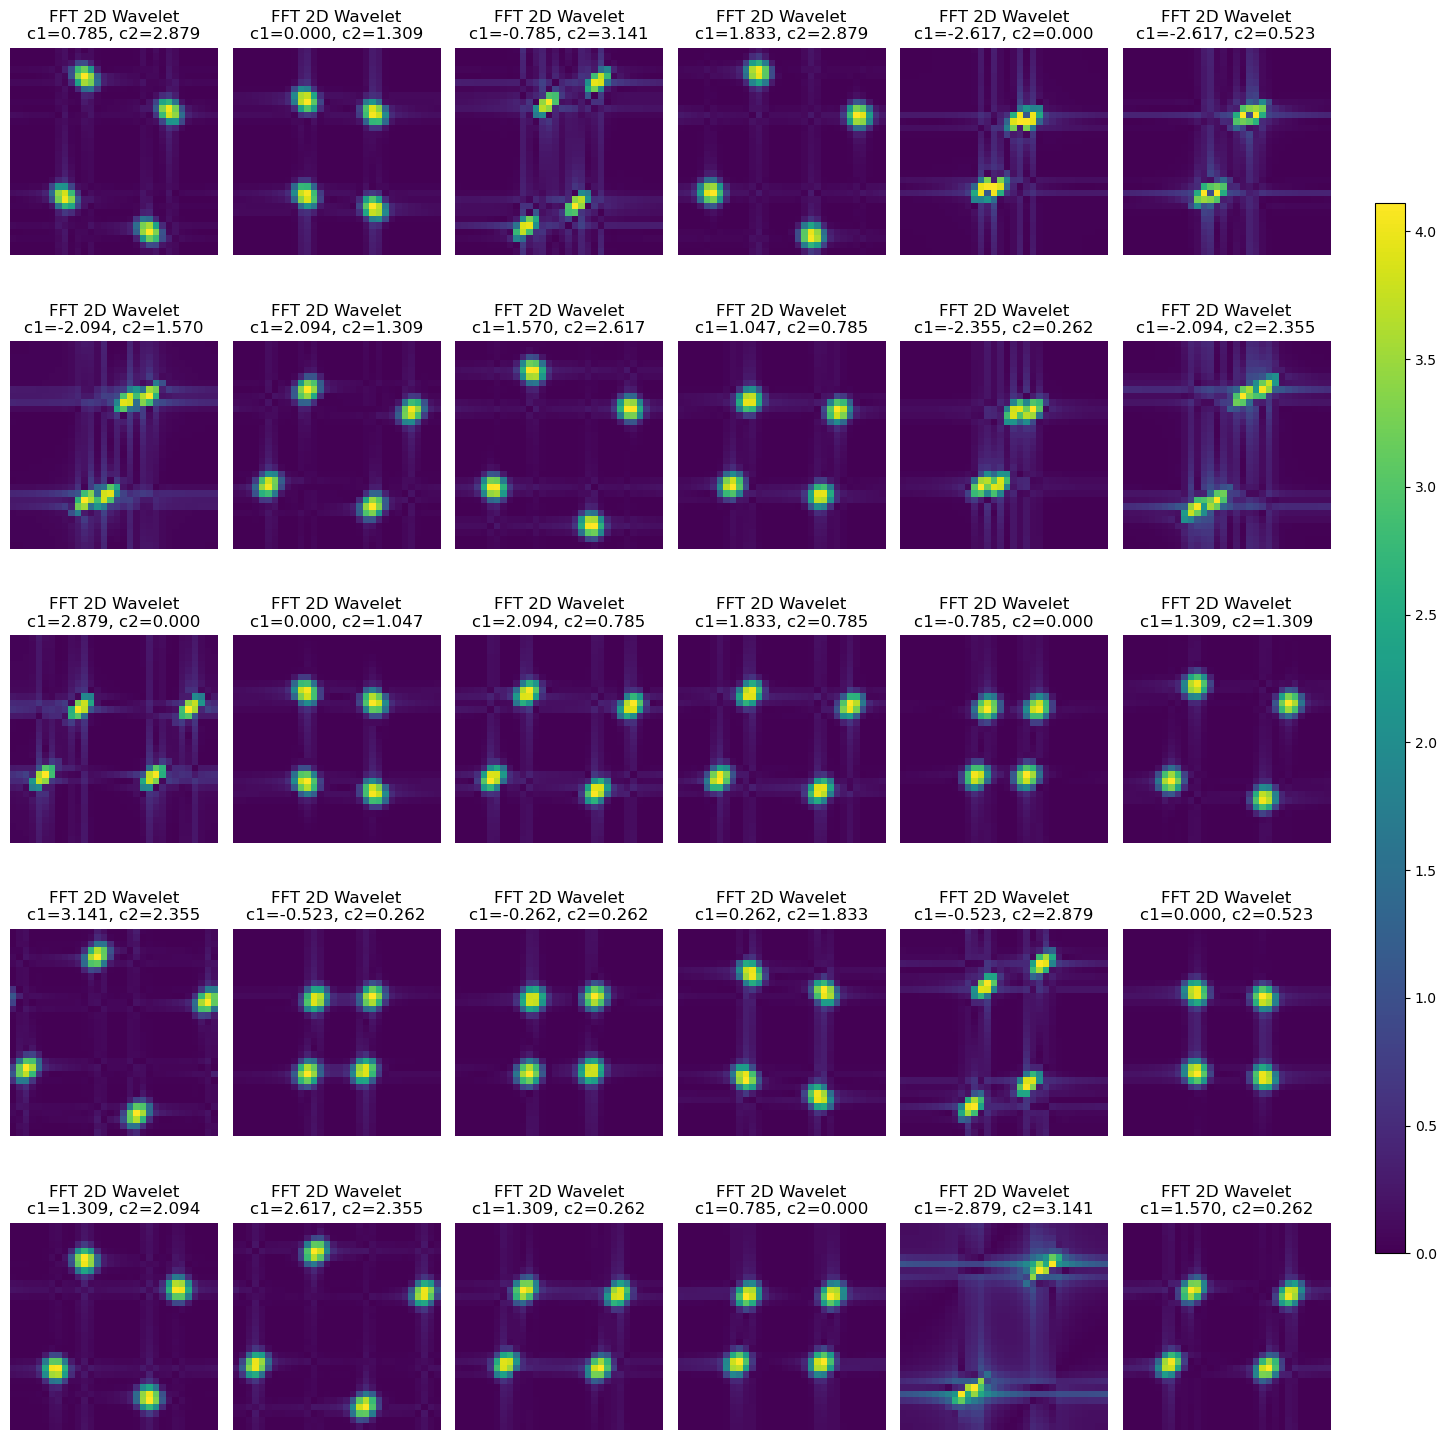

C:\Users\hz283\AppData\Local\Temp\ipykernel_13060\2390243887.py:78: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])


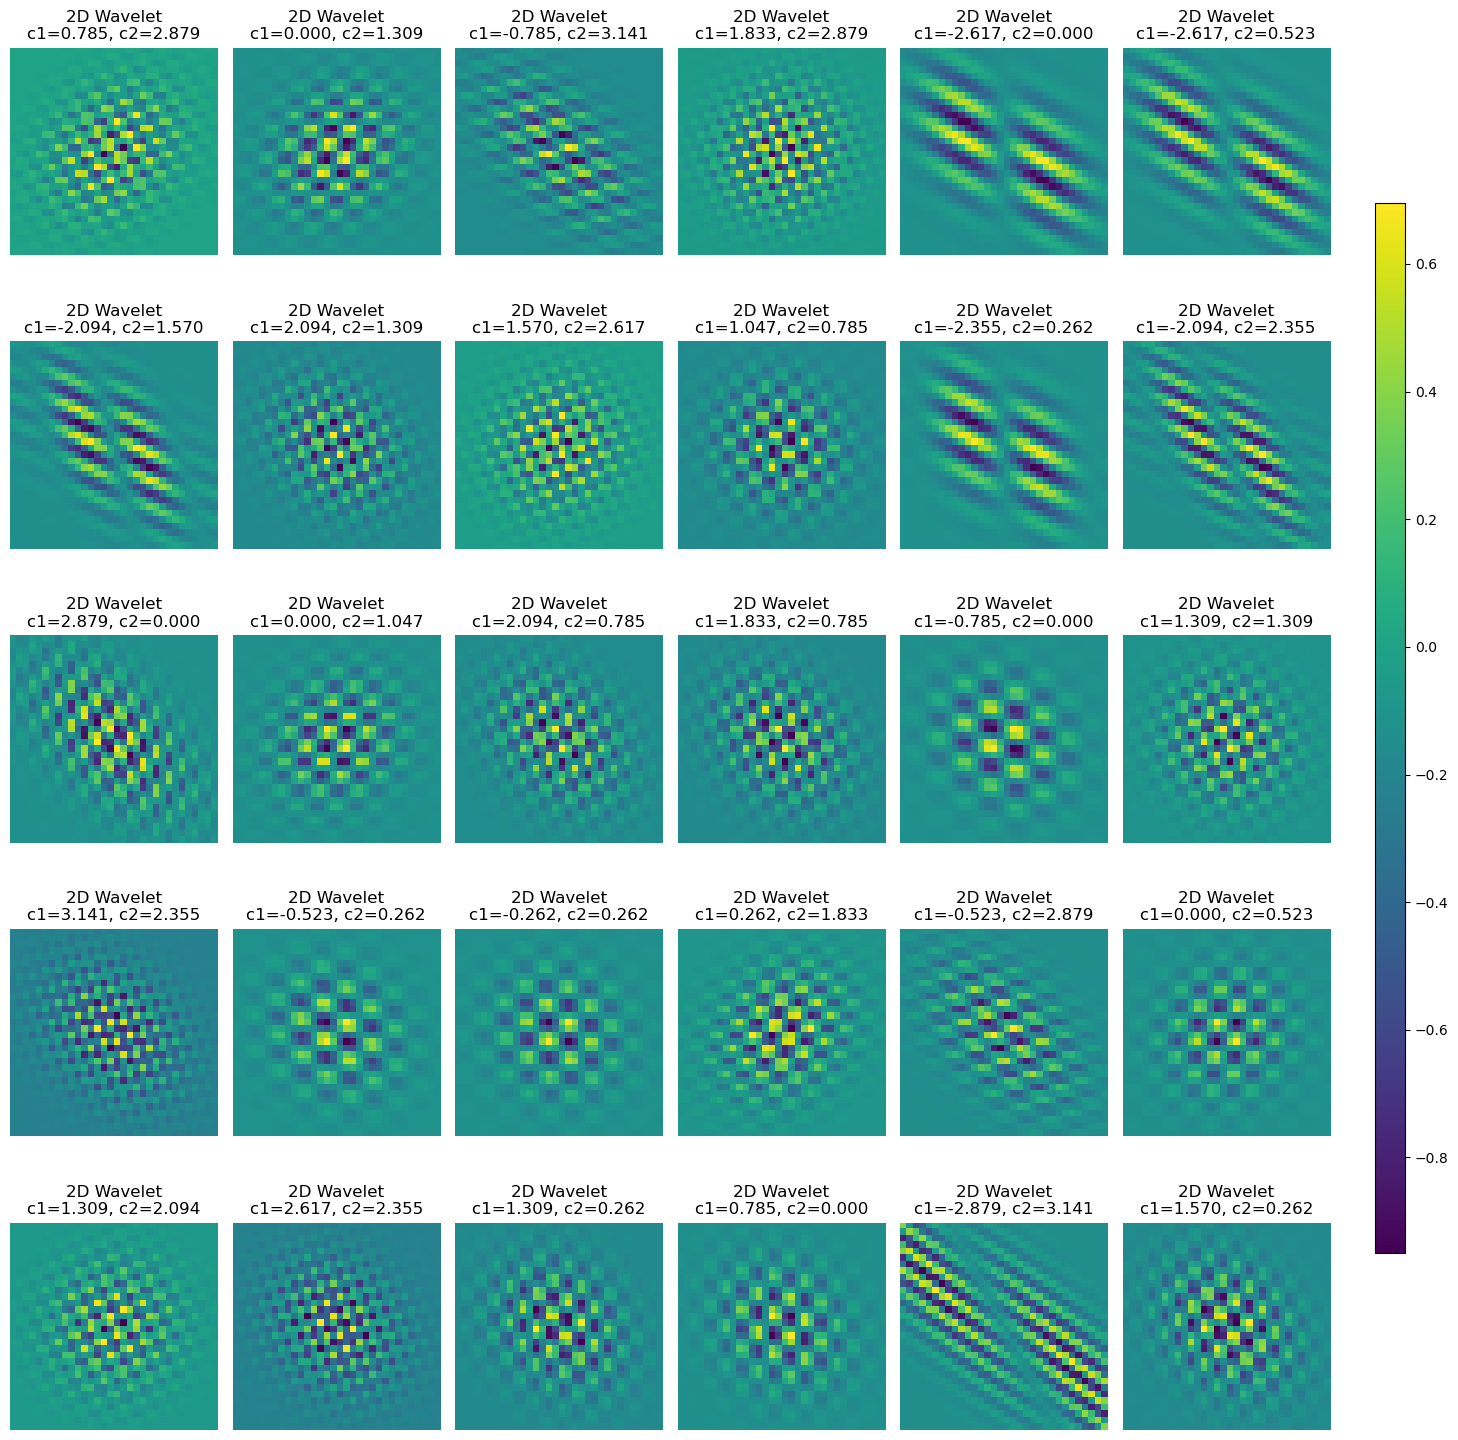

test_embeddings min: -0.950, max: 0.916
test_fourier min: 0.000, max: 72.782


In [ ]:
# Use a random sampling of wavevector_pairs instead
num_samples = 30  # or any number you want to visualize
rng = np.random.default_rng(seed=42)
indices = rng.choice(len(wavevector_pairs), size=num_samples, replace=False)
test_pairs = wavevector_pairs[indices]
num_rows = int(np.ceil(len(test_pairs) / 6))

# Generate embeddings for all pairs
test_embeddings = np.array([embed_2const_wavelet(c1/np.pi, c2/np.pi) for c1, c2 in test_pairs])
# Compute and visualize the Fourier transforms
test_fourier = np.array([np.fft.fftshift(np.abs(np.fft.fft2(embedding))) for embedding in test_embeddings])
# test_fourier = np.array([(ft - ft.min()) / (ft.max() - ft.min()) for ft in test_fourier])

# Plot the Fourier transforms
fig, axes = plt.subplots(num_rows, 6, figsize=(15, 3*num_rows))
axes = axes.flatten()
images = []

for i, ax in enumerate(axes):
    if i < len(test_pairs):
        im = ax.imshow(np.log1p(test_fourier[i]), cmap='viridis')
        images.append(im)
        ax.axis('off')
        ax.set_title(f'FFT 2D Wavelet\nc1={test_pairs[i][0]:.3f}, c2={test_pairs[i][1]:.3f}')
    else:
        ax.axis('off')  # Hide unused subplots

# Add colorbar
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
fig.colorbar(images[0], cax=cbar_ax)
plt.tight_layout(rect=[0, 0, 0.9, 1])
plt.show()

# Visualize the 2D wavelet embeddings
num_rows = (len(test_pairs) + 5) // 6  # Calculate number of rows needed for 6 plots per row
fig, axes = plt.subplots(num_rows, 6, figsize=(15, 3*num_rows))
axes = axes.flatten()  # Flatten array for easier indexing
images = []

for i, ax in enumerate(axes):
    if i < len(test_pairs):
        im = ax.imshow(test_embeddings[i], cmap='viridis')
        images.append(im)
        ax.axis('off')
        ax.set_title(f'2D Wavelet\nc1={test_pairs[i][0]:.3f}, c2={test_pairs[i][1]:.3f}')
    else:
        ax.axis('off')  # Hide unused subplots

# Add colorbar
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
fig.colorbar(images[0], cax=cbar_ax)
plt.tight_layout(rect=[0, 0, 0.9, 1])
plt.show()

print(f"test_embeddings min: {test_embeddings.min():.3f}, max: {test_embeddings.max():.3f}")
print(f"test_fourier min: {test_fourier.min():.3f}, max: {test_fourier.max():.3f}")

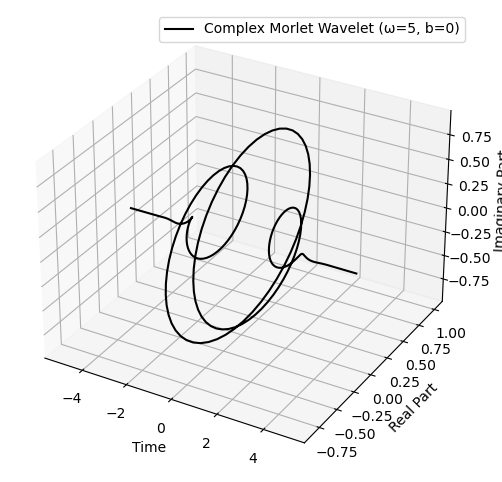

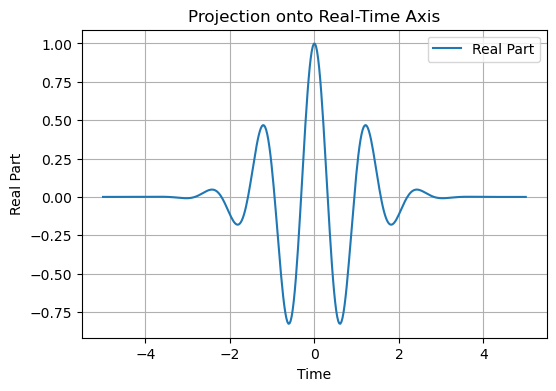

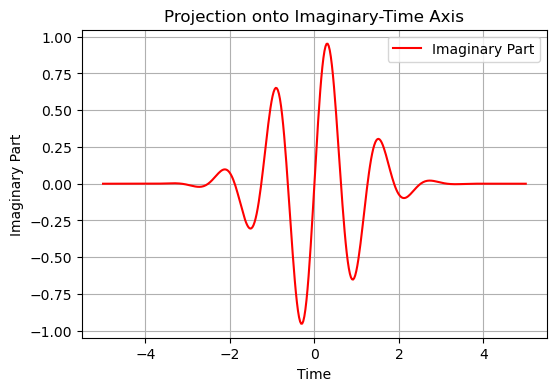

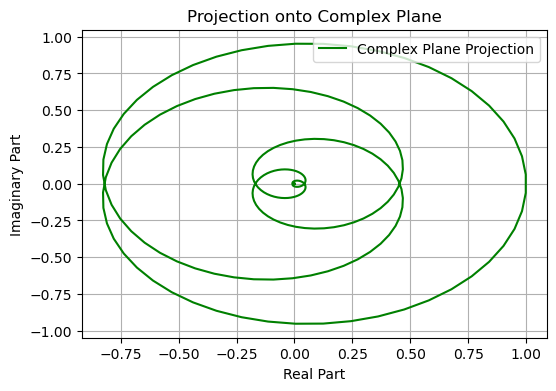

In [ ]:
def morlet_wavelet(t, omega=5, b=0):
    return np.exp(1j * omega * (t - b)) * np.exp(-0.5 * (t - b) ** 2)

def plot_morlet_3d(omega=5, b=0):
    t = np.linspace(-5, 5, 400)
    wavelet = morlet_wavelet(t, omega, b)
    
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111, projection='3d')
    
    ax.plot(t, np.real(wavelet), np.imag(wavelet), label=f'Complex Morlet Wavelet (ω={omega}, b={b})', color='k')
    ax.set_xlabel('Time')
    ax.set_ylabel('Real Part')
    ax.set_zlabel('Imaginary Part')
    ax.legend()
    
    plt.show()

def plot_real_projection(omega=5, b=0):
    t = np.linspace(-5, 5, 400)
    wavelet = morlet_wavelet(t, omega, b)
    
    plt.figure(figsize=(6, 4))
    plt.plot(t, np.real(wavelet), label='Real Part')
    plt.xlabel('Time')
    plt.ylabel('Real Part')
    plt.title('Projection onto Real-Time Axis')
    plt.legend()
    plt.grid()
    plt.show()

def plot_imag_projection(omega=5, b=0):
    t = np.linspace(-5, 5, 400)
    wavelet = morlet_wavelet(t, omega, b)
    
    plt.figure(figsize=(6, 4))
    plt.plot(t, np.imag(wavelet), label='Imaginary Part', color='r')
    plt.xlabel('Time')
    plt.ylabel('Imaginary Part')
    plt.title('Projection onto Imaginary-Time Axis')
    plt.legend()
    plt.grid()
    plt.show()

def plot_complex_plane_projection(omega=5, b=0):
    t = np.linspace(-5, 5, 400)
    wavelet = morlet_wavelet(t, omega, b)
    
    plt.figure(figsize=(6, 4))
    plt.plot(np.real(wavelet), np.imag(wavelet), label='Complex Plane Projection', color='g')
    plt.xlabel('Real Part')
    plt.ylabel('Imaginary Part')
    plt.title('Projection onto Complex Plane')
    plt.legend()
    plt.grid()
    plt.show()

# Example call with default values
plot_morlet_3d()
plot_real_projection()
plot_imag_projection()
plot_complex_plane_projection()


In [ ]:
def gabor_surface(x, y):
    sigma = 5.0  # standard deviation
    omega = 2.0  # frequency
    return np.exp(-(x**2 + y**2)/(2*sigma**2)) * np.cos(2*np.pi*omega*x)

def test_gabor_uniqueness(num_points=1000):
    # Generate random points
    x1 = np.random.uniform(-10, 10, num_points)
    y1 = np.random.uniform(-10, 10, num_points)
    x2 = np.random.uniform(-10, 10, num_points)
    y2 = np.random.uniform(-10, 10, num_points)
    
    # Calculate values
    z1 = gabor_surface(x1, y1)
    z2 = gabor_surface(x2, y2)
    
    # Check for any equal values
    equal_values = np.isclose(z1, z2, rtol=1e-10, atol=1e-10)
    
    # Print results
    print(f"Number of points tested: {num_points}")
    print(f"Number of equal values found: {np.sum(equal_values)}")
    if np.sum(equal_values) > 0:
        print("First few equal value pairs:")
        for i in range(min(5, np.sum(equal_values))):
            idx = np.where(equal_values)[0][i]
            print(f"Pair 1: ({x1[idx]:.3f}, {y1[idx]:.3f}) -> {z1[idx]:.3f}")
            print(f"Pair 2: ({x2[idx]:.3f}, {y2[idx]:.3f}) -> {z2[idx]:.3f}")

test_gabor_uniqueness(num_points=10000)  # Using 10000 points for better statistical significance

Number of points tested: 10000
Number of equal values found: 0


c1 shape: (8,) c2 shape: (8,)


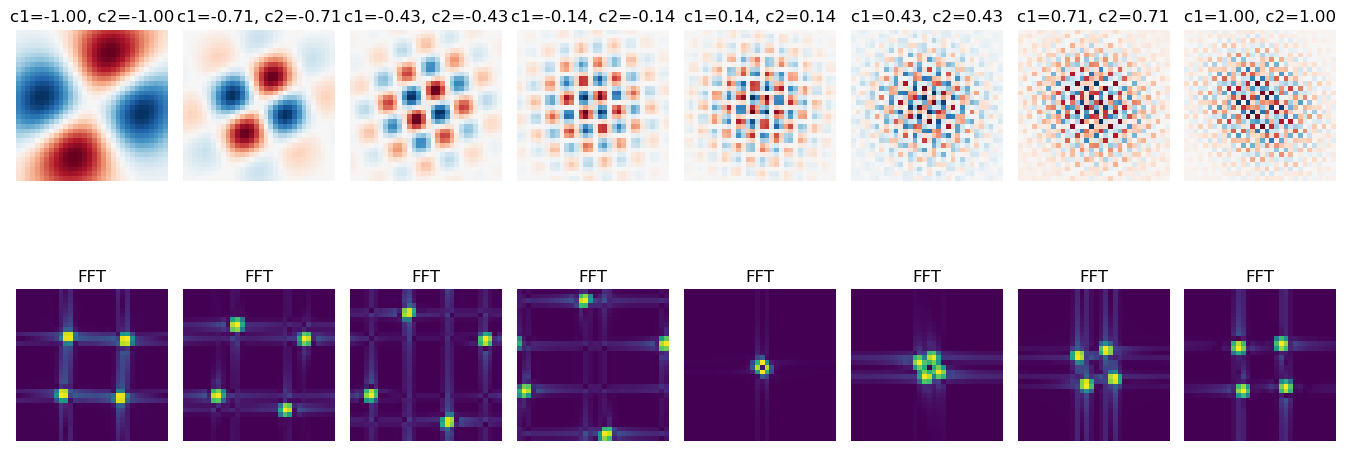

In [ ]:
import NO_utils_multiple

n = 8
# Create two vectors of constants ranging from -1 to 1
c1 = np.linspace(-1, 1, n)  # Creates 10 evenly spaced values from -1 to 1
c2 = np.linspace(-1, 1, n)  # Creates 10 evenly spaced values from -1 to 1

util_embeddings = NO_utils_multiple.embed_2const_wavelet(c1,c2, freq_range=0.8)
util_embeddings_fft = np.fft.fftshift(np.abs(np.fft.fft2(util_embeddings)))

# Create a figure with subplots arranged in a grid
n_images = len(util_embeddings)
n_cols = n
n_rows = int(np.ceil(n_images / n_cols)) * 2  # Double the rows for FFT plots

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 3*n_rows))
axes = axes.reshape(2, -1, n_cols)  # Reshape to separate original and FFT plots

# Plot each embedding and its FFT
for i in range(n_images):
    # Original embedding
    im1 = axes[0,i//n_cols,i%n_cols].imshow(util_embeddings[i], cmap='RdBu')
    axes[0,i//n_cols,i%n_cols].set_title(f'c1={c1[i]:.2f}, c2={c2[i]:.2f}')
    axes[0,i//n_cols,i%n_cols].axis('off')
    
    # FFT plot
    im2 = axes[1,i//n_cols,i%n_cols].imshow(np.log(util_embeddings_fft[i] + 1), cmap='viridis')
    axes[1,i//n_cols,i%n_cols].set_title(f'FFT')
    axes[1,i//n_cols,i%n_cols].axis('off')

# Remove empty subplots if any
for row in axes:
    for ax in row.flat[n_images:]:
        fig.delaxes(ax)

plt.tight_layout(rect=[0, 0, 0.9, 1])  # Adjust layout to make room for colorbar
plt.show()

